## 作業

設計錢包總金額為 1000 元，

如果購買商品總金額超過 1000 

會引發一個金額不足的例外 OverflowError

In [1]:
sum=0
dic1 = {}
while True:
    item = input("消費項目")
    price = input("消費金額")   
    try:
        if  sum+ int(price) > 1000:
            raise OverflowError
        dic1[item] = price            
        sum+=int(price)   
    except OverflowError:
         print('已經超支了')
         break   

消費項目 食品
消費金額 600
消費項目 休閒
消費金額 200
消費項目 其他
消費金額 100
消費項目 奢侈品
消費金額 500


已經超支了


## 寫出檔案

## 檔案存取

file object = open(file_name [, access_mode])

UTF8 編碼資料還請加入另一個參數才可避免亂碼：encoding=‘utf-8'
file object = open(file_name [, access_mode])

參數說明

file_name：file_name 參數是一個字串資料，代表包含要連結的文件名稱。

access_mode：access_mode 確定文件必須打開的模式，包括讀取、寫入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為讀取(r)。

|模式	|可做操作|若檔案不存在|是否覆蓋|
|----|--------|-----------|-------|
|r	|只能讀|報錯	|-|
|r+	|可讀可寫|報錯|是|
|w	|只能寫|建立|是|
|w+ |可讀可寫|建立|是|
|a　|只能寫|建立|否，追加寫|
|a+	|可讀可寫|建立|否，追加寫|

In [12]:
file = open("myData.txt",'a')
file.write("Vivin")
file.close()
print("完成")

完成


In [13]:
file = open("myData2.txt",'w',encoding='utf-8')
file.write("犇這個字必須是utf8編碼才有。")
file.close()
print("完成")

完成


In [17]:
f =  open("data.txt",'r',encoding="UTF-8")
msg = f.read()
print(msg)
f.close()

python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。




## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料

### Read

In [24]:
import csv
f = open('example1.csv','r')
for row in csv.reader(f):
    print(row[1])
f.close()

成交股數
2,104,640,545
2,640,781,030
2,983,756,821
3,062,757,248
3,314,147,435
2,610,433,477
3,595,611,551
3,322,390,467
2,969,248,375
3,497,838,901
3,184,795,667
3,720,277,205
4,088,756,925
4,540,373,544
5,486,734,180


In [35]:
import csv
with  open('example1.csv','r') as f:
    for row in csv.reader(f):
        print(row[1])


2,104,640,545
2,640,781,030
2,983,756,821
3,062,757,248
3,314,147,435
2,610,433,477
3,595,611,551
3,322,390,467
2,969,248,375
3,497,838,901
3,184,795,667
3,720,277,205
4,088,756,925
4,540,373,544
5,486,734,180


In [29]:
import csv
f = open('example.csv','r',encoding="utf-8")
for row in csv.DictReader(f):
    print(row["成交股數"])

2,104,640,545
2,640,781,030
2,983,756,821
3,062,757,248
3,314,147,435
2,610,433,477
3,595,611,551
3,322,390,467
2,969,248,375
3,497,838,901
3,184,795,667
3,720,277,205
4,088,756,925
4,540,373,544
5,486,734,180


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [33]:
import os
class TestFile:
     def openFile(self,filePath):   
            self.handle = open(filePath,"w")
            #self.handle.close()
            
t = TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")

PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'

## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [34]:
import os
class TestFile:
     def openFile(self,filePath):               
            with  open(filePath,"w") as f:
                f.write("Hello!")
t = TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")

Success


In [42]:
import csv
with  open('example1.csv','r') as f:
    for row in csv.reader(f):
        print(row[1])


2,104,640,545
2,640,781,030
2,983,756,821
3,062,757,248
3,314,147,435
2,610,433,477
3,595,611,551
3,322,390,467
2,969,248,375
3,497,838,901
3,184,795,667
3,720,277,205
4,088,756,925
4,540,373,544
5,486,734,180


## Json
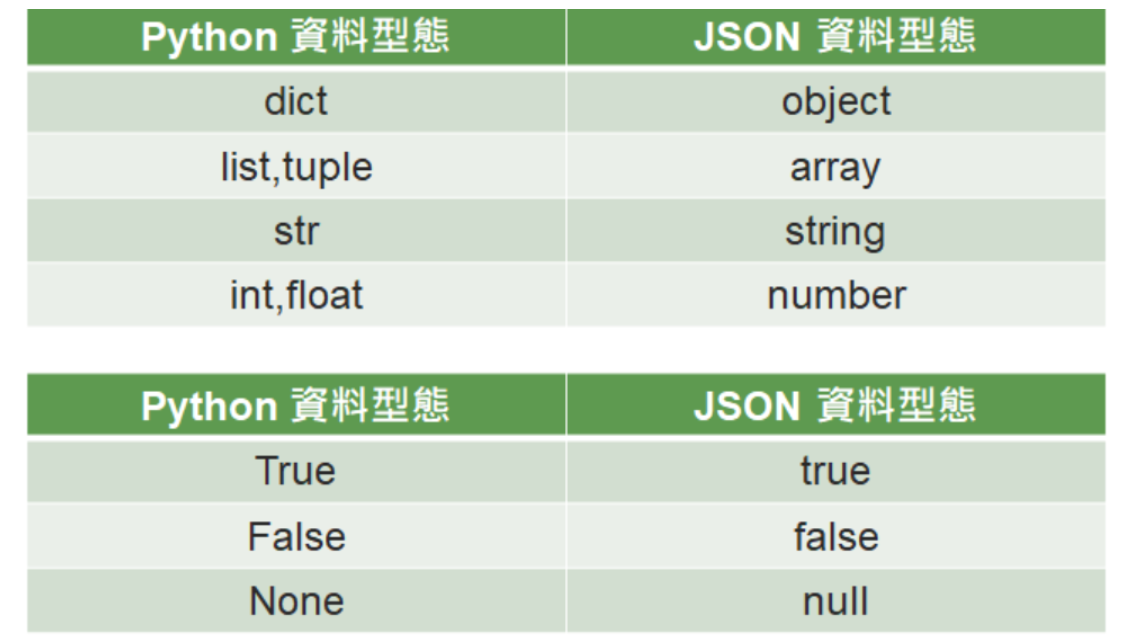

+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [45]:
import json
json1 = {'python':'課程',"gjun":100,"python-class":True,"Line":None}
print(json1)
print(type(json1))
jsonStr = json.dumps(json1,ensure_ascii = False)
print(jsonStr)
print(type(jsonStr))

{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}
<class 'dict'>
{"python": "課程", "gjun": 100, "python-class": true, "Line": null}
<class 'str'>


In [46]:
import json
json2 = {'python':"課程","gjun":100,"python-class":True,"Line":None}
with open('data0.json','w',encoding="utf-8") as outfile:
    json.dump(json2,outfile,ensure_ascii=False)

In [50]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
print(data)
#indent=2 增加閱讀性
with open("data.json","w",encoding="utf-8") as outfile:
     json.dump(data,outfile,ensure_ascii=False,indent=2)

{'people': [{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]}


### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。


In [51]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)
print(type(json2))
print(json2["gjun"])

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
<class 'dict'>
100


In [52]:
import json
with open("data.json","r",encoding="utf-8") as jsonFile:
    data = json.load(jsonFile)  
    for k in  data:
        print(f"{k}-{data[k]}")

people-[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]


## 壓縮與解壓縮 測試資料

In [53]:
import shutil
import os
try:
    os.mkdir('test2')
    print('建立目錄')
except:
    print('建立目錄失敗')

with open('./test2/test2.txt', 'a') as file2:
    file2.write('Programming is Fun.')
    print('完成附加檔案')
    
with open('./test2/test3.txt', 'a') as file2:
    file2.write('Programiz for beginners')
    print('完成附加檔案')
    
print('查看目錄內容')
os.listdir('./test2')

建立目錄
完成附加檔案
完成附加檔案
查看目錄內容


['test2.txt', 'test3.txt']

## 壓縮與解壓縮
### 但可以於Python程式內運用，可實現以下功能：
#### 建立zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的write()動作將資料夾壓縮。
#### 解壓縮zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的extractall()動作解壓縮。
#### 列出zip壓縮檔案內容
+透過zipfile.ZipFile( )建立物件，再透過物件的namelist()動作查看。


In [54]:
import zipfile
def create_zip(path):
  zf = zipfile.ZipFile(f'{path}.zip', 'w', zipfile.ZIP_DEFLATED)
  for root, dirs, files in os.walk(path):
    for file_name in files:
      zf.write(os.path.join(root, file_name))
def ziplist(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  print(zf.namelist())
def extra_zip(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  zf.extractall()

try:
  print('壓縮資料')
  create_zip('test2')
except:
  print('壓縮失敗')

try:
  print('查看壓縮資料')
  ziplist('test2.zip')
except:
  print('查看壓縮資料失敗')

try:
  print('刪除目錄')
  shutil.rmtree("test2")
except:
  print('刪除目錄失敗')

try:
  print('解壓縮資料')
  extra_zip('test2.zip')
except:
  print('解壓縮失敗')





壓縮資料
查看壓縮資料
['test2/test2.txt', 'test2/test3.txt']
刪除目錄
解壓縮資料


## 爬蟲
安裝

pip install beautifulsoup4

pip install html5lib


## BeautifulSoup Base
find() 只找第一個符合條件的

https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/#find-all

find_all() 找所有符合條件的

select_one() 只找一個符合條件的可直接使用css語法

select() 找所有符合條件的可使用css語法

In [62]:
from bs4 import BeautifulSoup

In [67]:
html='''<a id='a1' class="c1">V1</a>
<a id='a2' class="c1">V2</a>
<a id='a3' class="c3">V3</a>
'''
soup = BeautifulSoup(html,"html5lib")
obj1 = soup.find(id='a2')
print(obj1)
obj2 = soup.find_all(class_='c1')
print(obj2)

print(soup.select_one("#a1"))
print(soup.select(".c1"))

<a class="c1" id="a2">V2</a>
[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>]
<a class="c1" id="a1">V1</a>
[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>]


In [84]:
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1" href="https://google.com">Google</a>
<a id='a2' class="c1"  href="https://yahoo.com">Yahoo</a>
<a id='a3' class="c3" href="https://facebook.com">Facebook</a>
'''
soup = BeautifulSoup(html,"html5lib")
print(soup.find(id="a1").text)
print(soup.find(id="a1").getText())
print(soup.find(id="a2").get("href"))

tmpList = soup.find_all(class_ = "c1")
for tag in tmpList:
    print(tag.get("href"),tag.getText())

Google
Google
https://yahoo.com
https://google.com Google
https://yahoo.com Yahoo


## 電影排行榜

In [89]:
import requests
from bs4 import BeautifulSoup
url = "https://zh.wikipedia.org/zh-tw/2024年电影"
resp = requests.get(url)
resp.encoding = "utf-8"

soup = BeautifulSoup(resp.text,"html5lib")
movieTable = soup.find("table",class_="wikitable sortable")
tbody =  movieTable.find("tbody")
trList = tbody.find_all("tr")
for inx in range(1,len(trList)):
    print("排名:",trList[inx].find("th").text,end="")
    print("片名:",trList[inx].select_one("a").text)
    print("全球票房:",trList[inx].find_all("td")[2].text)

排名: 1
片名: 沙丘：第二部
全球票房: $704,747,649

排名: 2
片名: 哥吉拉與金剛：新帝國
全球票房: $522,403,756

排名: 3
片名: 功夫熊貓4
全球票房: $506,804,224

排名: 4
片名: 熱辣滾燙
全球票房: $479,596,986

排名: 5
片名: 飛馳人生2
全球票房: $468,849,262

排名: 6
片名: 第二十條
全球票房: $338,812,257

排名: 7
片名: 熊出沒·逆轉時空
全球票房: $274,013,872

排名: 8
片名: 魔鬼剋星：冰天凍地
全球票房: $188,414,063

排名: 9
片名: 音樂傳奇卜馬利：人生愛與夢
全球票房: $177,170,413

排名: 10
片名: 蜂刑者
全球票房: $152,720,535



## Numpy簡介

In [90]:
c1 = [1,3,5,7,9]
d1 = [3,5,6,7,9]
f1 = c1 + d1
print(f1)

[1, 3, 5, 7, 9, 3, 5, 6, 7, 9]


In [91]:
import numpy as np
c2 = np.array([1,3,5,7,9])
d2 = np.array([3,5,6,7,9])
f2 = c2 + d2
print(f2)

[ 4  8 11 14 18]


+ ndarray.ndim
   + 維度的數量。
+ ndarray.shape
   + 顯示出陣列在每個維度上的整數值。
+ ndarray.size
   + 陣列內元素的總數。
+ ndarray.dtype
   + 用來描述陣列中元素類型的對象。
   + https://numpy.org/doc/stable/user/basics.types.html

In [97]:
import numpy as np

i = [[1,2,3],
     [4,5,6]]
#軸(axis)
a = np.array(i,dtype = np.int8)
print(a.ndim)
print(a.shape)#軸0 2個元素 軸1 三個元素
print(a.size)
print(a.dtype)

2
(2, 3)
6
int8
